In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('./data/KNNAlgorithmDataset.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
data.drop('Unnamed: 32', axis=1, inplace=True)

In [6]:
M = data[data['diagnosis'] == 'M']
B = data[data['diagnosis'] == 'B']

In [7]:
((M.describe() / M.describe().sum()) - (B.describe() / B.describe().sum())) * 100

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,-0.000014,-17.071567,-14.904332,-20.221166,-7.347038,-0.134671,-0.308050,-0.367036,-0.225844,-0.269910,...,-20.228422,-17.226633,-21.149358,-6.694141,-0.205371,-0.868673,-0.890734,-0.371252,-0.537008,-0.153838
mean,0.865317,2.585435,2.371120,2.821963,0.164015,0.022530,0.045766,0.062549,0.034188,0.041828,...,3.027290,2.700178,2.740234,-0.549642,0.033107,0.123609,0.163167,0.064697,0.075697,0.020824
std,1.614599,0.577979,0.233387,0.889536,1.204910,0.002169,0.015907,0.023048,0.011715,0.006034,...,0.779444,0.277451,1.084140,1.493284,0.004678,0.053632,0.045277,0.011718,0.023235,0.006275
min,-0.000046,1.768139,0.906871,2.338163,0.852696,0.019946,0.016200,0.011250,0.009553,0.031742,...,1.884269,1.800742,1.868580,0.153041,0.021544,0.016284,0.011148,0.013604,0.029417,0.010442
25%,-0.003571,2.094454,2.305774,1.934378,-1.163765,0.020983,0.035900,0.045705,0.026190,0.037504,...,2.345273,2.590616,1.774154,-1.964951,0.030426,0.082616,0.130275,0.057405,0.062031,0.016279
50%,-0.003685,2.530491,2.440445,2.687167,-0.348356,0.022682,0.041080,0.060635,0.034021,0.041195,...,2.877695,2.743596,2.453199,-1.358181,0.032328,0.118596,0.148894,0.064623,0.069979,0.019626
75%,-0.014768,2.959599,2.596794,3.395720,0.727943,0.024005,0.053657,0.078486,0.039429,0.045636,...,3.471843,2.953605,3.293536,-0.588457,0.034801,0.144360,0.196822,0.071596,0.084572,0.024373
max,-2.457833,4.555471,4.049941,6.154240,5.909595,0.022355,0.099541,0.085363,0.070747,0.065970,...,5.842608,4.160445,7.935515,9.509048,0.048486,0.329575,0.195151,0.087610,0.192078,0.056019


In [8]:
col_list = list(data.drop('id', axis=1).describe().columns)

In [9]:
M_scaled = M[col_list] / M[col_list].count()
B_scaled = B[col_list] / B[col_list].count()

<function matplotlib.pyplot.show(close=None, block=None)>

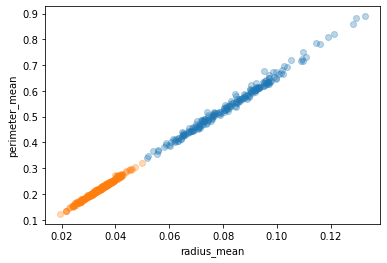

In [10]:
plt.scatter(M_scaled.radius_mean, M_scaled.perimeter_mean, alpha=0.3)
plt.scatter(B_scaled.radius_mean, B_scaled.perimeter_mean, alpha=0.3)
plt.xlabel('radius_mean')
plt.ylabel('perimeter_mean')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

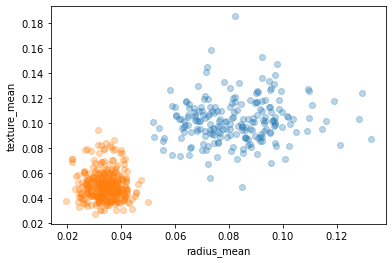

In [11]:
plt.scatter(M_scaled.radius_mean, M_scaled.texture_mean, alpha=0.3)
plt.scatter(B_scaled.radius_mean, B_scaled.texture_mean, alpha=0.3)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show

In [12]:
data['diagnosis'] = data['diagnosis'].replace('M', 0)
data['diagnosis'] = data['diagnosis'].replace('B', 1)

In [13]:
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

In [14]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [17]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
kn.score(X_test, y_test)

0.9370629370629371

In [18]:
kn.score(X_train, y_train)

0.9413145539906104

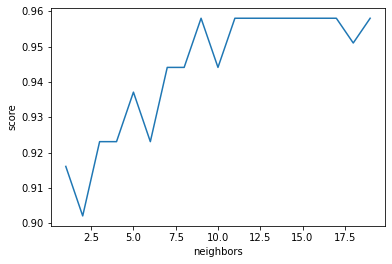

In [19]:
score_list = []

for n in range(1, 20):
    kn.n_neighbors = n
    kn.fit(X_train, y_train)
    score_list.append(round(kn.score(X_test, y_test), 4))

plt.plot(range(1, 20), score_list)
plt.xlabel('neighbors')
plt.ylabel('score')
plt.show()

In [20]:
result_df = pd.DataFrame(columns=['neighbors', 'score'])
n = 0
for neighbors, score in zip(range(1, len(score_list)), score_list):
    result_df.loc[n, 'neighbors'] = neighbors
    result_df.loc[n, 'score'] = score*100
    n += 1
result_df.sort_values('score', ascending=False)

,neighbors,score
10,11,95.8
16,17,95.8
15,16,95.8
14,15,95.8
13,14,95.8
12,13,95.8
11,12,95.8
8,9,95.8
17,18,95.1
9,10,94.41


In [21]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


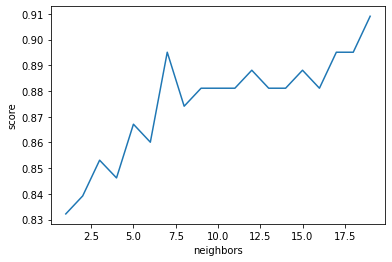

,neighbors,score
17,18,89.51
16,17,89.51
6,7,89.51
14,15,88.81
11,12,88.81
10,11,88.11
15,16,88.11
13,14,88.11
12,13,88.11
9,10,88.11


In [22]:
# X = data[['radius_mean', 'texture_mean']]
X = data[['radius_mean', 'perimeter_mean']]
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
kn.score(X_test, y_test)
score_list = []

for n in range(1, 20):
    kn.n_neighbors = n
    score_list.append(round(kn.score(X_test, y_test), 4))

plt.plot(range(1, 20), score_list)
plt.xlabel('neighbors')
plt.ylabel('score')
plt.show()
result_df = pd.DataFrame(columns=['neighbors', 'score'])
n = 0
for neighbors, score in zip(range(1, len(score_list)), score_list):
    result_df.loc[n, 'neighbors'] = neighbors
    result_df.loc[n, 'score'] = score*100
    n += 1
result_df.sort_values('score', ascending=False)